In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# data1 = pd.read_table('/home/guangya/Downloads/glucose-levels.txt',header = None,sep = ',')
# data1['time'] = data1[0] + data1[1]

In [3]:
# Codes for editing original file
# data1 = pd.read_table('/home/guangya/Downloads/glucose-levels.txt',header = None,sep = ',')
# data2 = pd.read_table('/home/guangya/Downloads/glucose-levels2.txt',header = None,sep = ',')

# data2['time'] = data2[0] + data2[1]
# import datetime
# for i in range(len(data1)):
#     time = data1.iloc[i]['time']
#     day = int(time[:2])
#     mon = int(time[3:5])
#     year = int(time[6:10])
#     hour = int(time[10:12])
#     mins = int(time[13:15])
#     sec = int(time[16:])
#     datetime1 = datetime.datetime(year,mon,day,hour,mins,sec)
#     data1.loc[i,'time'] = datetime1
# data1 = data1.drop(columns=[0,1])
# # for i in range(len(data2)):
# #     time = data2.iloc[i]['time']
# #     day = int(time[:2])
# #     mon = int(time[4])
# #     year = int(time[6:10])
# #     hour = int(time[10:12])
# #     mins = int(time[13:15])
# #     sec = int(time[16:])
# #     datetime1 = datetime.datetime(year,mon,day,hour,mins,sec)
# #     data2.loc[i,'time'] = datetime1
# # data2 = data2.drop(columns=[0,1])
# data1 = data1.rename(columns={2:'glucose level'})
# data1 = data1.sort_values(by='time')
# # data2 = data2.sort_values(by='time')
# data1.to_csv('cleaned_glucose1.csv',header = True,index=False)
# # data2.to_csv('cleaned_glucose2.csv',header = True,index=False)
# # Cleaning data

In [4]:
data_1 = pd.read_csv('cleaned_glucose1.csv')
data_2 = pd.read_csv('cleaned_glucose2.csv')

In [5]:
data = pd.read_csv('/home/guangya/Downloads/Data_July_raw.csv')


In [6]:
data.head()

time  glucose level
0  11/07/2020 19.26.30            298
1  11/07/2020 19.27.30            180
2  11/07/2020 19.39.30             90
3  11/07/2020 19.54.30             96
4  11/07/2020 20.09.30            116

In [7]:
x = list(data.iloc[1]['time'])

In [8]:
for i in range(len(data)):
    temp = list(data.iloc[i]['time'])
    temp[16] = ":"
    temp[13] = ":"
    data.loc[i,'time'] = ''.join(temp)

In [9]:
data.time = pd.to_datetime(data.time,dayfirst=True,yearfirst=True)
# data.index = data.time


In [10]:
data_1.time = pd.to_datetime(data_1.time)
data_1.index = data_1.time

data_1['day'] = [d.day for d in data_1.time]
data_1['hour'] = [d.hour for d in data_1.time]

In [11]:
data_2.time = pd.to_datetime(data_2.time)
data_2.index = data_2.time

data_2['day'] = [d.day for d in data_2.time]
data_2['hour'] = [d.hour for d in data_2.time]

In [12]:
data['day'] = [d.day for d in data.time]
data['hour'] = [d.hour for d in data.time]

In [13]:
data['glucose level'].mean()

119.18472515856237

In [14]:
data['glucose level'].var()

251.94551337937065

In [15]:
data['glucose level'].std() / data['glucose level'].mean()

0.13317806946533434

In [16]:
data = data.iloc[2:]

In [17]:
from plotly import graph_objs as go
import pandas as pd
from scipy.signal import find_peaks

In [18]:
date_temp = data
data.index = data.time

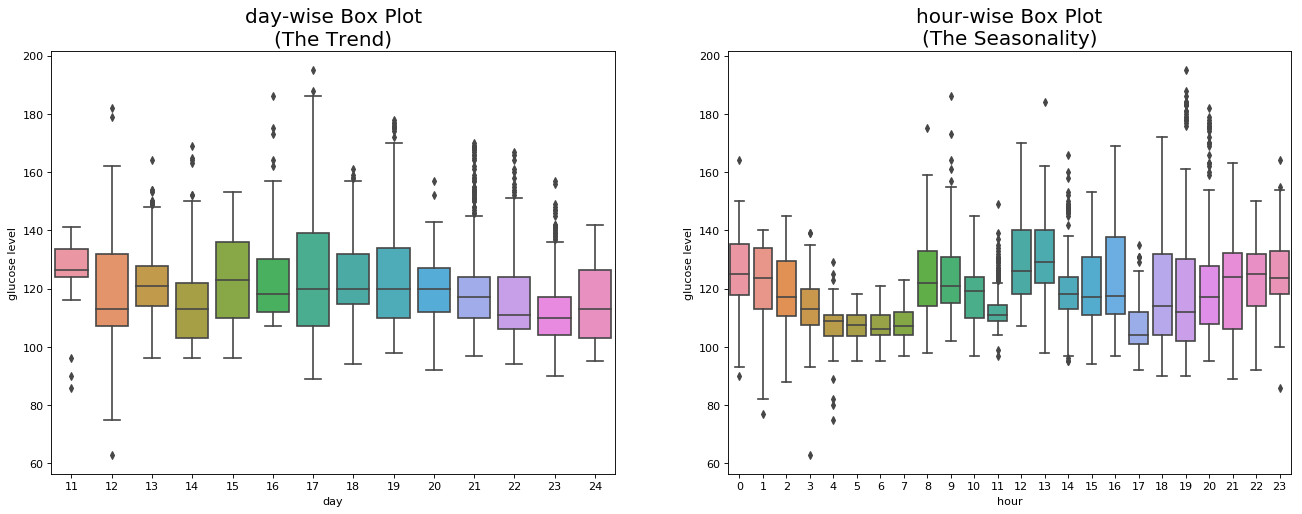

In [19]:
df = data
days = df['day'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(days), replace=False)

# Draw Plot
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='day', y='glucose level', data=df, ax=axes[0])
sns.boxplot(x='hour', y='glucose level', data=df,ax = axes[1])

# Set Title
axes[0].set_title('day-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('hour-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [20]:
# temp = np.zeros((len(indices),len(valley_indexes)))
# for i in range(len(indices)):
#     for j in range(len(valley_indexes)):
#         temp[i][j] = np.abs(indices[i] - valley_indexes[j])
# drop_idx1 = indices[np.where(temp <= 20)[0]]
# drop_idx2 = valley_indexes[np.where(temp <= 20)[1]]
# for i in range(len(drop_idx1)):
#     plt.plot(data.iloc[drop_idx1[i]:drop_idx2[i]+1].time,data.iloc[drop_idx1[i]:drop_idx2[i]+1]['glucose level'])
#     if(i == 2):
#         break
# Ignore

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

In [22]:
# def frequencyGenerator(time, steps=None):
#     𝛿 = time.max() - time.min()
#     if steps is None:
#         steps = int(𝛿 / np.diff(time).mean() / 2) # or np.diff(time).min()
#     M = np.arange(1, steps + 1)
#     return M / 𝛿, steps
# def easyFourierTransform(time, values, frequency = None, steps = 100):
#     if frequency is None:            
#         ft = frequencyGenerator(time, steps)
#         frequency = ft.reshape(ft.shape[0])
#     else:
#         ft = frequency[:, np.newaxis]
    
#     # sorting the inputs
#     order = np.argsort(time)
#     ts = np.array(time)[order]
#     Xs = np.array(values)[order]

#     𝜃 = (ts - time.min()) * 2 * np.pi * ft
#     Y = polarToRectangular(Xs, 𝜃)[:, :-1] * np.diff(ts)
#     amplitude = np.abs(Y.sum(axis=1))
#     return frequency, amplitude
# Ignore

In [23]:
# f1, a1 = easyFourierTransform(data.index, data['glucose level'])
# plt.plot(f1, a1)

In [24]:
# Interpolating
data.index = data.time
data.index = data['glucose level'].index - pd.DateOffset(seconds=30)
data_int = data['glucose level'].resample('1T').asfreq() 
data_int = data_int.interpolate(method='linear', order=3)

In [25]:
data_1.index = data_1.time
data_1.index = data_1['glucose level'].index - pd.DateOffset(seconds=30)
data_int1 = data_1['glucose level'].resample('1T').asfreq() 
data_int1 = data_int1.interpolate(method='linear', order=3)

In [26]:
data_2.index = data_2.time
data_2.index = data_2['glucose level'].index - pd.DateOffset(seconds=30)
data_int2 = data_2['glucose level'].resample('1T').asfreq() 
data_int2 = data_int2.interpolate(method='linear', order=3)

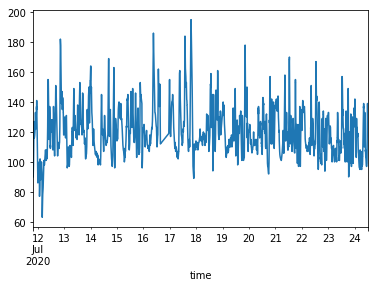

In [27]:
data_int.plot()

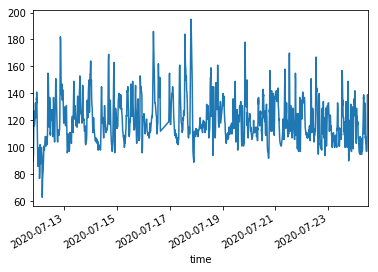

In [28]:
data['glucose level'].plot()

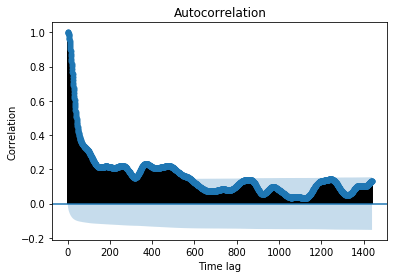

In [29]:
plot_acf(data_int1, lags=1440)
plt.xlabel('Time lag')
plt.ylabel('Correlation')
plt.show()

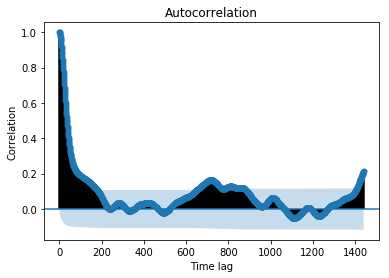

In [30]:
plot_acf(data_int2, lags=1440)
plt.xlabel('Time lag')
plt.ylabel('Correlation')
plt.show()

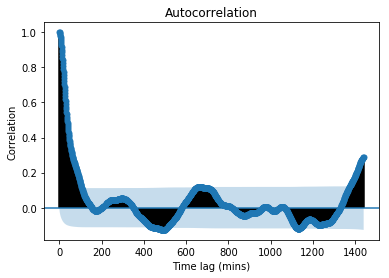

In [31]:
plot_acf(data_int, lags=1440)
plt.xlabel('Time lag (mins)')
plt.ylabel('Correlation')
plt.show()

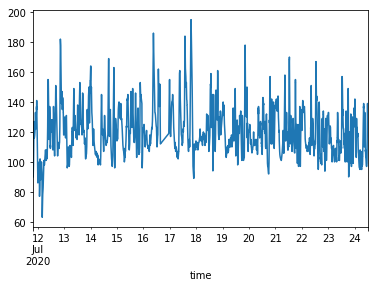

In [33]:
data_int.plot()

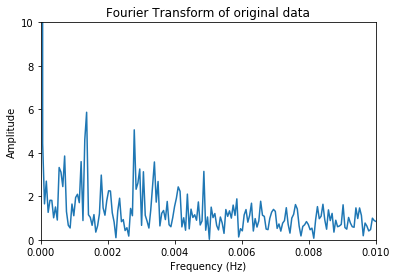

In [34]:
from scipy import fft
N = data_int.shape[0]
T = 1
xf = np.linspace(0.0, 1/ (2* T), N//2) # Why is it one here?
plt.ylim(0,10)
plt.xlim(0,0.01) 
plt.title('Fourier Transform of original data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
yf1 = fft(data_int)
plt.plot(xf,2 / N * np.abs(yf1[0:N//2])) # What is the 2 / N part?

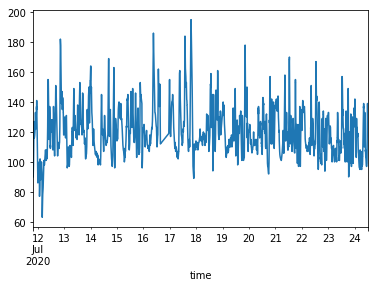

In [35]:
data_int.plot()

In [36]:
import statsmodels.api as sm

acf = pd.Series(sm.tsa.acf(data_int, nlags=len(data_int)))

([<matplotlib.axis.XTick at 0x7ff38027a630>,
 <a list of 25 Text xticklabel objects>)

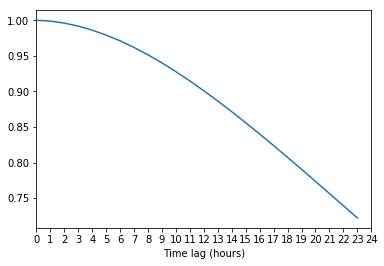

In [37]:
acf[:24].plot()
plt.xlabel('Time lag (hours)')
plt.xticks(np.arange(0, 25, step=1))

In [38]:
 acf.index = acf.index / 60

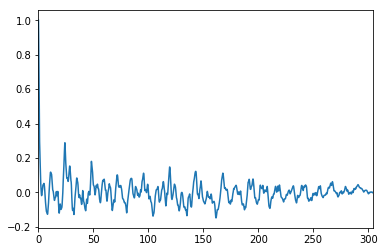

In [39]:
acf.plot()

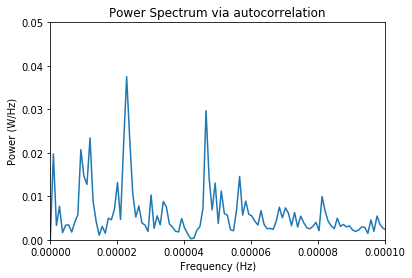

In [40]:
from scipy import fftpack # Autocorrelation method
y = acf
N = acf.shape[0]
T = 1
xf = np.linspace(0.0, 1/ (2 * T), N//2)
plt.xlim(0,0.0001)
plt.ylim(0,0.05)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W/Hz)')
plt.title('Power Spectrum via autocorrelation')
yf = fft(y)
plt.plot(xf / 60,(2 / N * np.abs(yf[0:N//2])))

# For unit of X, we can use either HZ which is cycle per seconds of CPH which is cycle per hour

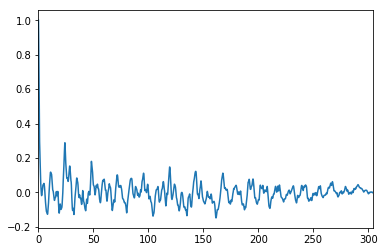

In [41]:
y.plot()

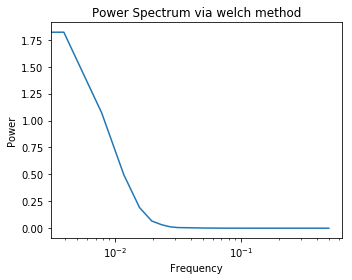

In [43]:
from scipy.signal import find_peaks, peak_prominences,peak_widths,welch
freqs, psd = welch(data_int) # Use welch's method for power density>
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, 2 / N *psd)
plt.title('Power Spectrum via welch method')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [46]:
peaks, _ = find_peaks(data_int)
valleys, _ = find_peaks(data_int * -1)
x = data_int
results_half = peak_widths(x, peaks, rel_height=0.5)
# results_half[0]  # widths
results_full = peak_widths(x, peaks, rel_height=1)
# results_full[0]  # widths
x = data_int * -1
results_half1 = peak_widths(x, valleys, rel_height=0.5)
# results_half[0]  # widths
results_full1 = peak_widths(x, valleys, rel_height=1)

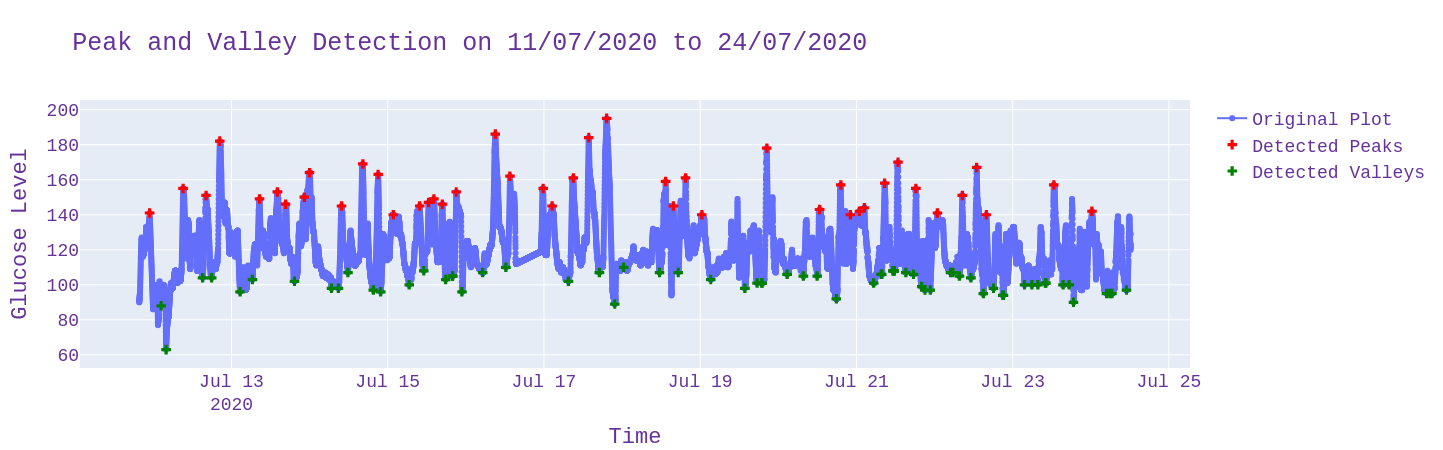

In [378]:
data1 = data_int
# How to deal with peaks?
peak_indices = peaks[(results_half[0] > 30)]
peak_indices = peak_indices[data1[peak_indices] >= 140]
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = data1.index,
    y=  data1.values,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=data1[peak_indices].index,
    y=[data1.values[j] for j in peak_indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))
inv_data = data1*(-1)

valley_indexes = valleys[results_half1[0] > 45]

valley_indexes = valley_indexes[data1[valley_indexes] <= 110]
fig.add_trace(go.Scatter(
    x=data1[valley_indexes].index,
    y=[data1.values[j] for j in valley_indexes],
    mode='markers',
    marker=dict(
        size=8,
        color='green',
        symbol='cross'
    ),
    name='Detected Valleys'
))

fig.update_layout(
    title="Peak and Valley Detection on 11/07/2020 to 24/07/2020",
    xaxis_title="Time",
    yaxis_title="Glucose Level",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

In [44]:
data_int1 = data_int[(data_int.index.day >= 20) & (data_int.index.day <= 24)]

In [45]:
data_int1 = data_int1.iloc[420:-317]

In [46]:
data_int1

time
2020-07-20 07:00:00    114.000000
2020-07-20 07:01:00    115.000000
2020-07-20 07:02:00    114.000000
2020-07-20 07:03:00    114.000000
2020-07-20 07:04:00    113.714286
2020-07-20 07:05:00    113.428571
2020-07-20 07:06:00    113.142857
2020-07-20 07:07:00    112.857143
2020-07-20 07:08:00    112.571429
2020-07-20 07:09:00    112.285714
2020-07-20 07:10:00    112.000000
2020-07-20 07:11:00    112.000000
2020-07-20 07:12:00    112.000000
2020-07-20 07:13:00    112.000000
2020-07-20 07:14:00    112.000000
2020-07-20 07:15:00    111.000000
2020-07-20 07:16:00    112.000000
2020-07-20 07:17:00    111.000000
2020-07-20 07:18:00    110.000000
2020-07-20 07:19:00    110.000000
2020-07-20 07:20:00    110.000000
2020-07-20 07:21:00    110.000000
2020-07-20 07:22:00    111.000000
2020-07-20 07:23:00    111.000000
2020-07-20 07:24:00    111.000000
2020-07-20 07:25:00    110.000000
2020-07-20 07:26:00    111.000000
2020-07-20 07:27:00    110.000000
2020-07-20 07:28:00    110.000000
2020-07-2

In [364]:
peaks, _ = find_peaks(data_int1)
valleys, _ = find_peaks(data_int1 * -1)
x = data_int1
results_half = peak_widths(x, peaks, rel_height=0.5)
# results_half[0]  # widths
results_full = peak_widths(x, peaks, rel_height=1)
# results_full[0]  # widths
x = data_int1 * -1
results_half1 = peak_widths(x, vadata1lleys, rel_height=0.5)
# results_half[0]  # widths
results_full1 = peak_widths(x, valleys, rel_height=1)

array([ 100,  209,  342,  537,  732,  907, 1076, 1166, 1541, 1629, 1786,
       1858, 1982, 2116, 2254, 2351, 2424, 2514, 2973, 3054, 3237, 3414,
       3639, 3777, 3785, 3915, 4013, 4417, 4658, 4882, 4994, 5138, 5225,
       5229, 5362, 5452])

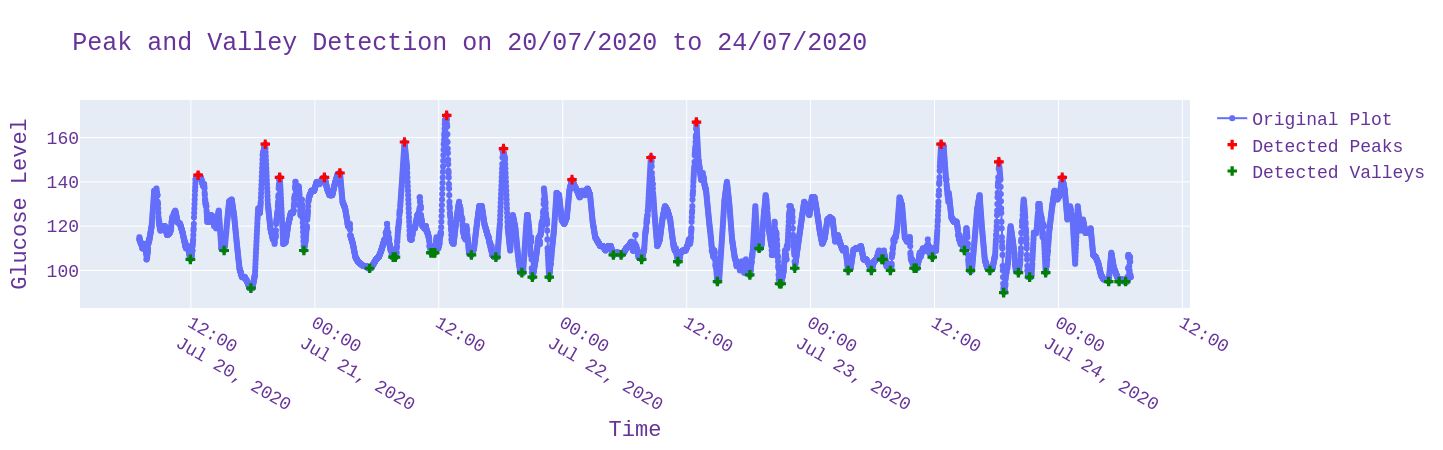

In [375]:
data1 = data_int1
# How to deal with peaks?
peak_indices = peaks[(results_half[0] > 20)]
peak_indices = peak_indices[data1[peak_indices] > 140]
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = data1.index,
    y=  data1.values,
    mode='lines+markers',
    name='Original Plot'
))


fig.add_trace(go.Scatter(
    x=data1[peak_indices].index,
    y=[data1.values[j] for j in peak_indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))
inv_data = data1*(-1)

valley_indexes = valleys[results_half1[0] > 20]

valley_indexes = valley_indexes[data1[valley_indexes] <= 110]

fig.add_trace(go.Scatter(
    x=data1[valley_indexes].index,
    y=[data1.values[j] for j in valley_indexes],
    mode='markers',
    marker=dict(
        size=8,
        color='green',
        symbol='cross'
    ),
    name='Detected Valleys'
))
fig.update_layout(
    title="Peak and Valley Detection on 20/07/2020 to 24/07/2020",
    xaxis_title="Time",
    yaxis_title="Glucose Level",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [47]:
keys = np.concatenate([valleys,peaks])

NameError: name 'valleys' is not defined

In [48]:
val1 = np.zeros(len(valleys))
val2 = np.ones(len(valleys))
values = np.concatenate([val1,val2])
my_dict = dict(zip(keys, values))
my_dict = dict(sorted(my_dict.items()))

NameError: name 'valleys' is not defined

In [211]:
columns = ['hour','exp_lin_binary', 'rise_drop_bin']
report_df = pd.DataFrame(columns = columns)

In [212]:
def drops_algo(data,peak,val,cutoff = 20):
    columns = ['hour','exp_lin_bin', 'rise_drop_bin','idx_1','idx_2']
    
    report_df = pd.DataFrame(columns = columns)
    df
    keys = np.concatenate([val,peak])
    val1 = np.zeros(len(val))
    val2 = np.ones(len(peak))
    values = np.concatenate([val1,val2])
    my_dict = dict(zip(keys, values))
    my_dict = dict(sorted(my_dict.items()))
    
    base_indx = next(iter(my_dict))
    base_value = my_dict[base_indx]

    for k,v in my_dict.items():
#         if base_value == v:
#             continue
            
        gluco1 = data.iloc[base_indx]
        gluco2 = data.iloc[k]
        if(np.abs(gluco1 - gluco2) < cutoff):
            continue
            
        rise_drop_bin = 'rise' if base_value == 0 else 'drop'
        hour = data.index[base_indx].hour
        
        temp = data[base_indx : k]
        
        mod1 = sm.OLS(np.linspace(0,len(temp),len(temp)), temp.values)
        res1 = mod1.fit()
        rlin = res1.rsquared
        
        mod2 = sm.OLS(np.linspace(0,len(temp),len(temp)), np.log(temp.values))
        res2 = mod2.fit()
        rexp = res2.rsquared
        
        exp_lin_bin = 'exp' if rexp > rlin else 'linear'
        
        idx1 = data.index[base_indx]
        idx2 = data.index[k]
        
        report_df = report_df.append(pd.DataFrame([[hour,exp_lin_bin,rise_drop_bin,idx1,idx2]],columns = columns))
        
        base_indx = k
        base_value = v
        
    return report_df
        
        
        
    

In [281]:
df = drops_algo(data_int,peak_indices,valley_indexes)

In [199]:
df['idx_1'].iloc[5]

Timestamp('2020-07-20 20:06:00')

In [334]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func_exp(x, a, b, c):
        #c = 0
        return a * np.exp(b * x) + c

def exponential_regression (index,x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.001, 1))
    print(popt)
    puntos = plt.plot(index, y_data, 'x', color='red', label = "data")
    curva_regresion = plt.plot(index, func_exp(x_data, *popt), color='green', label = "Exponential fit".format(*popt))
    m, b = np.polyfit(x_data, y_data, 1)
    plt.plot(index,m*x + b,label = 'linear',color = 'blue')
    plt.xlabel('Time Unit (min)')
    plt.ylabel('Glucose Level')
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

In [335]:
data_temp = data_int.loc[df['idx_1'].iloc[24]:df['idx_1'].iloc[25]]
x = np.linspace(0,len(data_temp),len(data_temp))
y = data_temp.values
# m, b = np.polyfit(x, y, 1)


# plt.plot(x,y,label = 'linear')
# plt.plot(x, m*x + b,label = 'original')
# plt.plot(x, np.exp(m1*x + b1),label = 'exp')
# plt.legend()

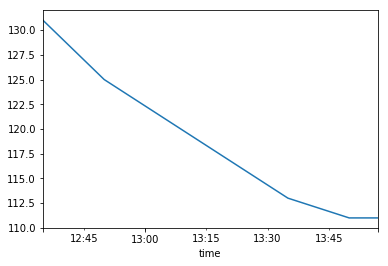

In [336]:
data_temp.plot()

[ 3.23657588e+01 -1.26196648e-02  9.86296855e+01]


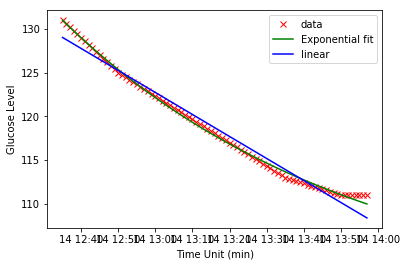

array([130.99544431, 130.58464751, 130.17906466, 129.77862961,
       129.38327701, 128.99294236, 128.60756196, 128.22707293,
       127.8514132 , 127.48052146, 127.11433721, 126.75280068,
       126.39585289, 126.0434356 , 125.69549131, 125.35196324,
       125.01279534, 124.67793227, 124.34731939, 124.02090276,
       123.69862911, 123.38044587, 123.06630112, 122.75614359,
       122.44992268, 122.14758843, 121.84909151, 121.5543832 ,
       121.26341543, 120.97614072, 120.69251219, 120.41248357,
       120.13600916, 119.86304386, 119.59354312, 119.32746298,
       119.06476001, 118.80539135, 118.54931468, 118.29648823,
       118.04687073, 117.80042145, 117.55710019, 117.31686725,
       117.07968342, 116.84551   , 116.61430879, 116.38604206,
       116.16067257, 115.93816354, 115.71847867, 115.50158211,
       115.28743848, 115.07601282, 114.86727065, 114.6611779 ,
       114.45770095, 114.25680659, 114.05846205, 113.86263497,
       113.66929339, 113.47840576, 113.28994094, 113.10

In [337]:
exponential_regression(data_temp.index,x,y)

In [97]:
data.groupby('day').hour.value_counts().loc[15]

hour
11    22
7     19
8     19
14    19
18    19
21    18
12    16
20    12
19    11
0      4
1      4
2      4
3      4
4      4
5      4
6      4
9      4
10     4
13     4
15     4
16     4
17     4
23     4
22     2
Name: hour, dtype: int64

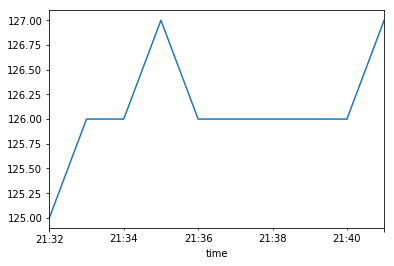

In [484]:
data.iloc[8:18]['glucose level'].plot()

# df.groupby('exp_lin_bin').size()

In [98]:
df.groupby('rise_drop_bin').size()

rise_drop_bin
drop    16
rise    21
dtype: int64

In [99]:
df

hour exp_lin_bin rise_drop_bin               idx_1               idx_2
0   21         exp          drop 2020-07-11 21:19:00 2020-07-12 00:36:00
0    0         exp          rise 2020-07-12 00:36:00 2020-07-12 01:21:00
0    1      linear          drop 2020-07-12 01:21:00 2020-07-12 03:06:00
0    3         exp          rise 2020-07-12 03:06:00 2020-07-12 03:52:00
0    3      linear          rise 2020-07-12 03:52:00 2020-07-12 04:36:00
0    4      linear          drop 2020-07-12 04:36:00 2020-07-12 06:28:00
0    6         exp          rise 2020-07-12 06:28:00 2020-07-12 08:45:00
0    8      linear          rise 2020-07-12 08:45:00 2020-07-12 09:14:00
0    9         exp          drop 2020-07-12 09:14:00 2020-07-12 09:35:00
0    9         exp          rise 2020-07-12 09:35:00 2020-07-12 11:35:00
0   11         exp          rise 2020-07-12 11:35:00 2020-07-12 13:35:00
0   13      linear          drop 2020-07-12 13:35:00 2020-07-12 14:12:00
0   14         exp          rise 2020-07-12 14:12:00 2020-07-12 15:05:00
0   15         exp          drop 2020-07-12 15:05:00 2020-07-12 20:14:00
0   20      linear          rise 2020-07-12 20:14:00 2020-07-12 20:27:00
0   20         exp          rise 2020-07-12 20:27:00 2020-07-12 21:20:00
0   21         exp          drop 2020-07-12 21:20:00 2020-07-12 23:56:00
0   23         exp          rise 2020-07-12 23:56:00 2020-07-13 02:37:00
0    2      linear          drop 2020-07-13 02:37:00 2020-07-13 03:49:00
0    3      linear          rise 2020-07-13 03:49:00 2020-07-13 06:55:00
0    6      linear          drop 2020-07-13 06:55:00 2020-07-13 08:42:00
0    8         exp          rise 2020-07-13 08:42:00 2020-07-13 09:13:00
0    9         exp          drop 2020-07-13 09:13:00 2020-07-13 12:03:00
0   12         exp          drop 2020-07-13 12:03:00 2020-07-13 17:10:00
0   17         exp          drop 2020-07-13 17:10:00 2020-07-13 18:18:00
0   18      linear          rise 2020-07-13 18:18:00 2020-07-13 21:12:00
0   21      linear          drop 2020-07-13 21:12:00 2020-07-13 21:48:00
0   21      linear          rise 2020-07-13 21:48:00 2020-07-13 23:48:00
0   23         exp          rise 2020-07-13 23:48:00 2020-07-14 01:36:00
0    1         exp          drop 2020-07-14 01:36:00 2020-07-14 03:38:00
0    3      linear          rise 2020-07-14 03:38:00 2020-07-14 09:39:00
0    9         exp          rise 2020-07-14 09:39:00 2020-07-14 10:36:00
0   10      linear          drop 2020-07-14 10:36:00 2020-07-14 12:32:00
0   12         exp          rise 2020-07-14 12:32:00 2020-07-14 13:47:00
0   13      linear          rise 2020-07-14 13:47:00 2020-07-14 16:17:00
0   16         exp          rise 2020-07-14 16:17:00 2020-07-14 17:32:00
0   17         exp          drop 2020-07-14 17:32:00 2020-07-14 18:32:00

In [100]:
df.pivot_table(index=['hour'], columns='exp_lin_bin', aggfunc='size', fill_value=0).merge(df.pivot_table(index=['hour'], columns='rise_drop_bin', aggfunc='size', fill_value=0),left_index = True,right_index = True)

exp  linear  drop  rise
hour                         
0       1       0     0     1
1       1       1     2     0
2       0       1     1     0
3       1       3     0     4
4       0       1     1     0
6       1       1     1     1
8       1       1     0     2
9       4       0     2     2
10      0       1     1     0
11      1       0     0     1
12      2       0     1     1
13      0       2     1     1
14      1       0     0     1
15      1       0     1     0
16      1       0     0     1
17      2       0     2     0
18      0       1     0     1
20      1       1     0     2
21      2       2     3     1
23      2       0     0     2

In [477]:
df.pivot_table(index=['hour'], columns='rise_drop_bin', aggfunc='size', fill_value=0)

rise_drop_bin  drop  rise
hour                     
0                 5     1
1                 0     1
2                 1     2
3                 0     2
4                 1     1
5                 1     2
6                 0     1
7                 1     0
8                 6     1
9                 8     3
10                2     3
11                0     5
12                6     1
13                3     4
14                4     2
15                3     6
16                6     1
17                1     8
18                2     3
19                6     4
20                5     5
21                3     7
22                6     5
23                3     3

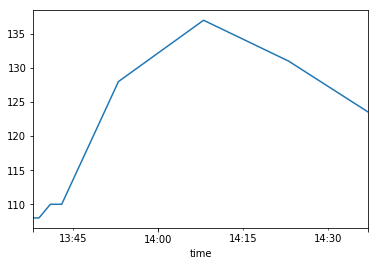

In [266]:
data_int[peak_indices[10]-30:peak_indices[10]+30].plot()

In [105]:
assume_cut = data.index[20] - data.index[10] 
stable_cut = 5

def measure_error(df):
    
    val = []
    relative_sd = []
    i_list = []
    for i in range(len(df)):
        if(i >= len(df) - 5):
            continue
        time1 = df.index[i]
        time2 = df.index[i+5]
        
     
        if(time2 - time1 == assume_cut):
            temp_df = df.iloc[i:i+10]['glucose level']
            
            ma = temp_df.max()
            mi = temp_df.min()
            
            
            mean = temp_df.mean()
            
            error = (temp_df - mean)
            
            if (error.max() > stable_cut):
                continue
            i_list.append(i)
            sd = temp_df.std()
            
            
            val.append(error[1:].values)
            if(sd != 0):
                relative_sd.append(sd / mean)
            else:
                relative_sd.append(0)
        else:
            continue
    print(len(val))
    val = np.array(val)
    print(val)
    mean_error = np.absolute(val).mean()
#     std_error = val.std()
    
    return mean_error,relative_sd,i_list
            

In [197]:
np.array(sd).mean()

0.014782817598347549

In [106]:
error,sd,i = measure_error(data)

32
[[ 1.1 -0.9  0.1  0.1 -0.9  0.1  1.1  1.1  1.1]
 [ 0.5  0.5 -0.5  0.5  0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5 -1.5 -1.5  1.5  0.5  2.5  0.5 -0.5]
 [ 1.4  0.4  0.4 -0.6 -1.6 -0.6 -0.6 -0.6  0.4]
 [-0.3 -0.3 -0.3 -0.3  0.7  0.7  0.7 -0.3 -0.3]
 [-0.3 -0.3 -0.3  0.7  0.7  0.7 -0.3 -0.3 -0.3]
 [-0.3 -0.3  0.7  0.7  0.7 -0.3 -0.3 -0.3 -0.3]
 [-0.3  0.7  0.7  0.7 -0.3 -0.3 -0.3 -0.3 -0.3]
 [-0.3 -1.3 -0.3  1.7  0.7  0.7 -0.3 -0.3 -0.3]
 [-1.3 -0.3  1.7  0.7  0.7 -0.3 -0.3 -0.3 -0.3]
 [-0.2  1.8  0.8  0.8 -0.2 -0.2 -0.2 -0.2 -1.2]
 [ 1.7  0.7  0.7 -0.3 -0.3 -0.3 -0.3 -1.3 -0.3]
 [ 0.7  0.7 -0.3 -0.3 -0.3 -0.3 -1.3 -0.3 -0.3]
 [-1.9 -1.9 -1.9 -0.9  4.1  3.1  1.1  1.1  0.1]
 [-2.2 -2.2 -1.2  3.8  2.8  0.8  0.8 -0.2 -0.2]
 [-2.4 -1.4  3.6  2.6  0.6  0.6 -0.4 -0.4 -0.4]
 [-1.5  3.5  2.5  0.5  0.5 -0.5 -0.5 -0.5 -1.5]
 [ 3.3  2.3  0.3  0.3 -0.7 -0.7 -0.7 -1.7 -0.7]
 [ 0.2  1.2  1.2  1.2 -0.8 -1.8 -0.8 -0.8  0.2]
 [ 2.6  1.6  0.6  1.6 -1.4 -1.4 -2.4 -2.4 -2.4]
 [ 2.3  1.3  2.3 -0.7 -0.7 -1.7 -1.7 

In [194]:
error.mean()

1.1767361111111105

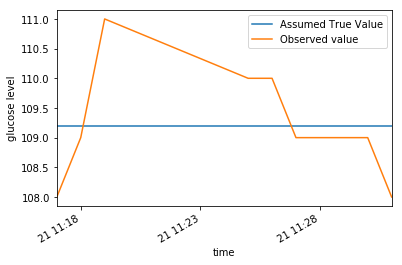

In [193]:
plt.ylabel('glucose level')
temp = data[i[10]:i[10]+10]
plt.plot(temp.index,np.repeat(temp['glucose level'].mean(),10),label = 'Assumed True Value')
data[i[10]:i[10]+10]['glucose level'].plot(label = 'Observed value')
plt.legend()

In [192]:
np.repeat(temp.mean(),10)

glucose level    109.2
glucose level    109.2
glucose level    109.2
glucose level    109.2
glucose level    109.2
glucose level    109.2
glucose level    109.2
glucose level    109.2
glucose level    109.2
glucose level    109.2
day               21.0
day               21.0
day               21.0
day               21.0
day               21.0
day               21.0
day               21.0
day               21.0
day               21.0
day               21.0
hour              11.0
hour              11.0
hour              11.0
hour              11.0
hour              11.0
hour              11.0
hour              11.0
hour              11.0
hour              11.0
hour              11.0
dtype: float64

In [186]:
np.repeat(10,10)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [46]:
error

1.7594588122605364

In [519]:
idx

1.140175425099138

In [491]:
assume_cut = data.index[20] - data.index[10] 

In [85]:
day1 = data_int1[:1440]

In [86]:
day2 = data_int1[1440:2880]

In [87]:
day3 = data_int1[2880:4320]

In [88]:
day4 = data_int1[4320:-1]

In [386]:
# Question: Compare plots after or below interpolation? 

In [379]:
# Check trend and see if there are interesting findings at any time interval for those 4 days specifically

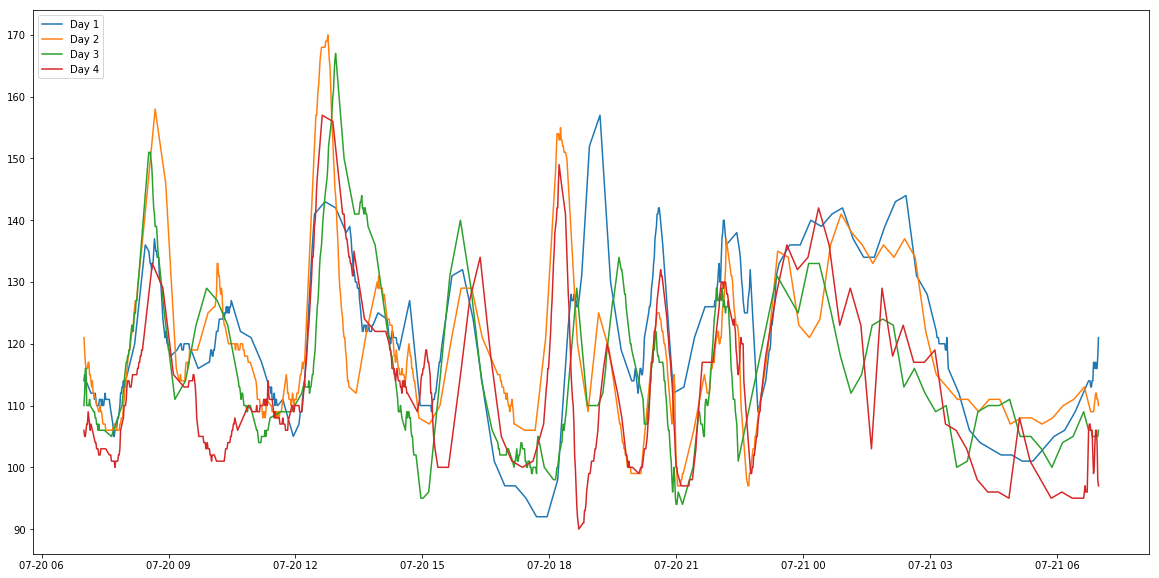

In [83]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(day1)
plt.legend(['Day 1','Day 2','Day 3','Day 4'],loc='upper left')

In [114]:
data[data.index.day == 20].index.hour.value_counts() <= 10

7     False
20    False
13    False
10    False
8     False
22    False
9     False
12    False
23    False
11    False
14    False
15    False
18    False
6     False
21     True
16     True
17     True
19     True
5      True
4      True
3      True
2      True
1      True
0      True
Name: time, dtype: bool

In [115]:
data[data.index.day == 21].index.hour.value_counts() <= 10

14    False
7     False
11    False
12    False
22    False
10    False
21    False
20    False
13    False
19    False
18    False
3     False
9     False
8     False
6     False
16    False
17    False
1      True
2      True
23     True
4      True
5      True
15     True
0      True
Name: time, dtype: bool

In [116]:
data[data.index.day == 22].index.hour.value_counts() <= 10

20    False
12    False
17    False
14    False
19    False
8     False
21    False
7     False
22    False
10    False
11    False
13    False
18    False
16    False
6     False
15     True
3      True
1      True
2      True
23     True
4      True
5      True
9      True
0      True
Name: time, dtype: bool

In [117]:
data[data.index.day == 23].index.hour.value_counts() <= 10

11    False
7     False
22    False
20    False
18    False
19    False
9     False
14    False
12    False
10    False
8     False
21    False
15    False
13    False
6     False
17     True
23     True
16     True
5      True
4      True
3      True
2      True
1      True
0      True
Name: time, dtype: bool

In [112]:
data[data.index.day == 24].index.hour.value_counts()

7     38
9     35
6     25
10    23
11    19
8     19
12    16
5      4
4      4
3      4
2      4
1      4
0      4
Name: time, dtype: int64

In [50]:
getup = data_int1.index[0]
meal1 = data_int1.index[data_int1.index.hour == 7][35]
meal2 = data_int1.index[data_int1.index.hour == 7][50]
meal3 = data_int1.index[data_int1.index.hour == 11][45]
meal4 = data_int1.index[data_int1.index.hour == 12][50]
meal5 = data_int1.index[data_int1.index.hour == 14][45]
meal6 = data_int1.index[data_int1.index.hour == 17][30]
meal7 = data_int1.index[data_int1.index.hour == 19][50]
meal8 = data_int1.index[data_int1.index.hour == 21][35]

exe1_s = data_int1.index[data_int1.index.hour == 14][30]
exe1_e = data_int1.index[data_int1.index.hour == 14][44]

exe2_s = data_int1.index[data_int1.index.hour == 18][15]
exe2_e = data_int1.index[data_int1.index.hour == 18][30]

sleep = data_int1.index[data_int1.index.hour == 23][0]

In [ ]:
# need to set day1 as sum of day1,2,3,4

In [89]:
day1 = pd.DataFrame(day1)

In [91]:
day1['day2'] = day2.values

In [93]:
day1['day3'] = day3.values

In [94]:
day1['day4'] = day4.values

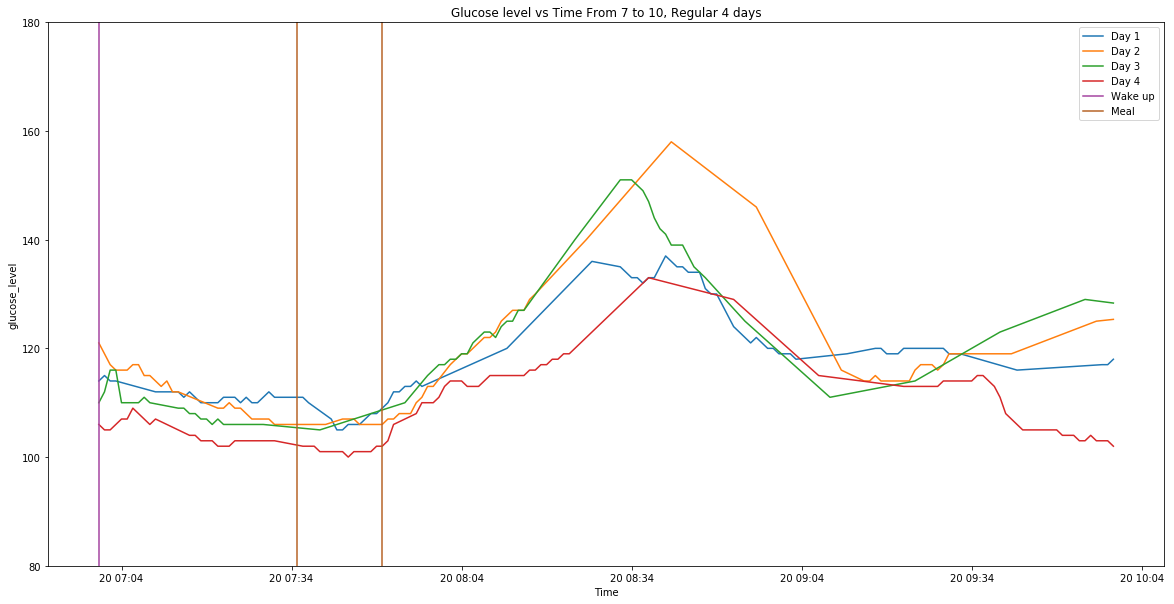

In [106]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(day1[(day1.index.hour <= 9) & (day1.index.hour >= 7)])

plt.title('Glucose level vs Time From 7 to 10, Regular 4 days')
np.random.seed(7)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),3, replace=False)
plt.axvline(x=getup,color = mycolors[0],label = 'Woke up')

plt.axvline(x=meal1,color = mycolors[1],label = 'Meal 1')
plt.axvline(x=meal2,color = mycolors[1],label = 'Meal 2')
plt.xlabel('Time')
plt.ylabel('glucose_level')
plt.legend(['Day 1','Day 2','Day 3','Day 4','Wake up','Meal'],loc='upper right')
plt.ylim(80,180)
plt.savefig('figure1.png')

In [162]:
data_int1.index[data_int1.index.hour == 11][45]

Timestamp('2020-07-20 11:45:00')

(80, 180)

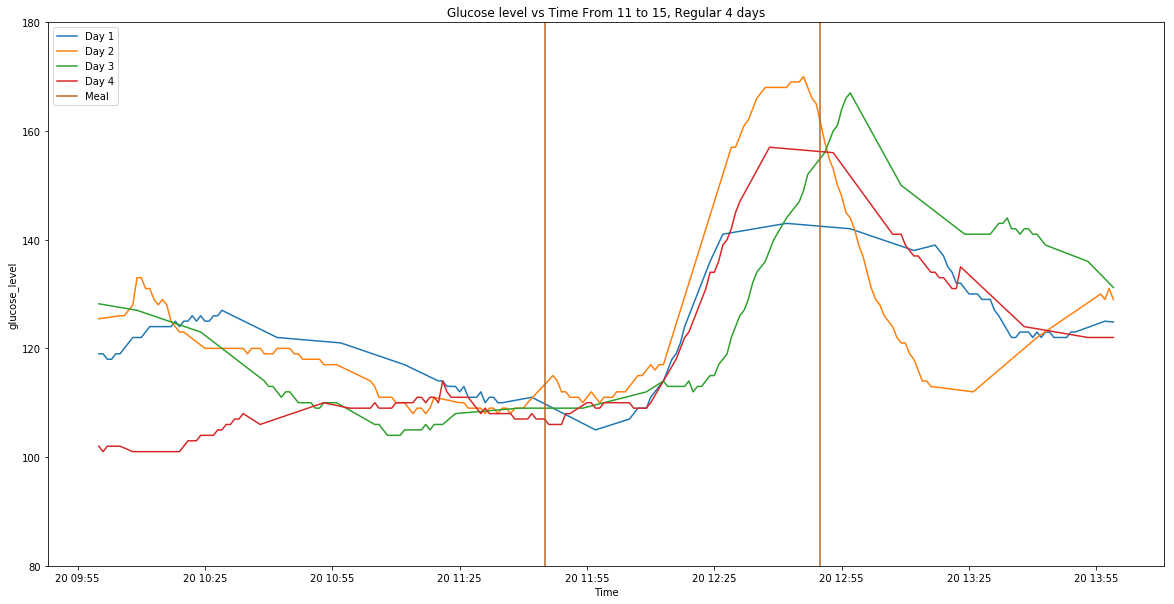

In [97]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(day1[(day1.index.hour <= 13) & (day1.index.hour >= 10)])

plt.axvline(x=meal3,color = mycolors[1],label = 'Meal 3')
plt.axvline(x=meal4,color = mycolors[1],label = 'Meal 4')
plt.legend(['Day 1','Day 2','Day 3','Day 4','Meal'],loc='upper left')
plt.title('Glucose level vs Time From 11 to 15, Regular 4 days')
plt.xlabel('Time')
plt.ylabel('glucose_level')
plt.ylim(80,180)
plt.savefig('figure2.png')


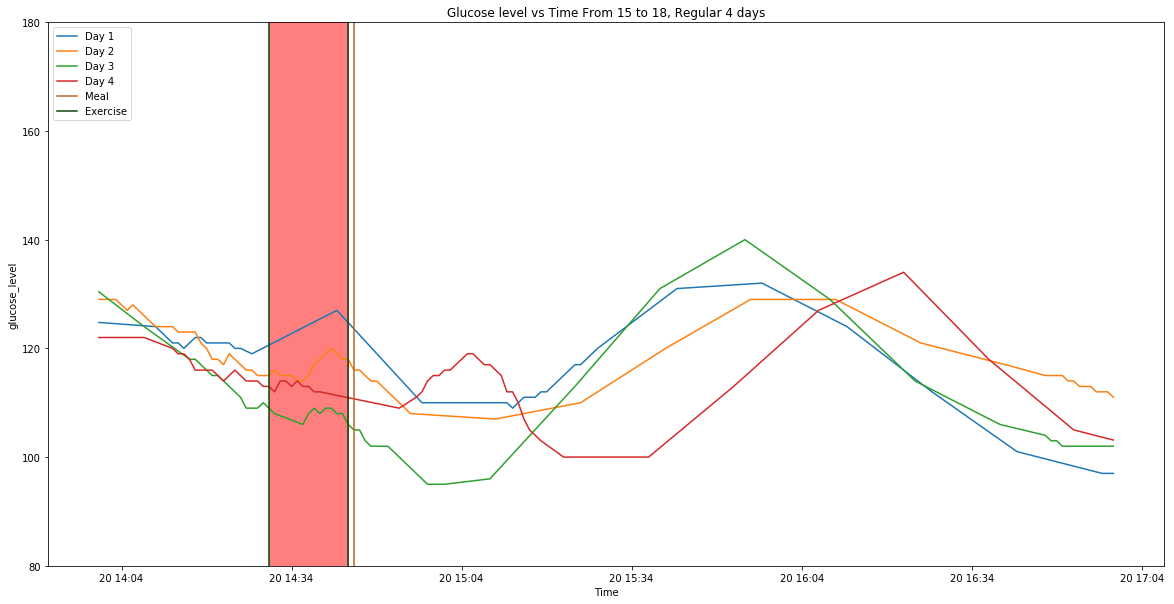

In [102]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(day1[(day1.index.hour <= 16) & (day1.index.hour >= 14)])
plt.axvline(x=meal5,color = mycolors[1],label = 'Meal 5')
plt.axvline(x=exe1_s,color = mycolors[2],label = 'Exercise 1 start')
plt.axvline(x=exe1_e,color = mycolors[2],label = 'Exercise 1 end')

ax.axvspan(exe1_s, exe1_e, alpha=0.5, color='red')
plt.legend(['Day 1','Day 2','Day 3','Day 4','Meal','Exercise'],loc='upper left') # A lot of interpolation here
plt.title('Glucose level vs Time From 15 to 18, Regular 4 days')
plt.xlabel('Time')
plt.ylabel('glucose_level')
plt.ylim(80,180)
plt.savefig('figure3.png')

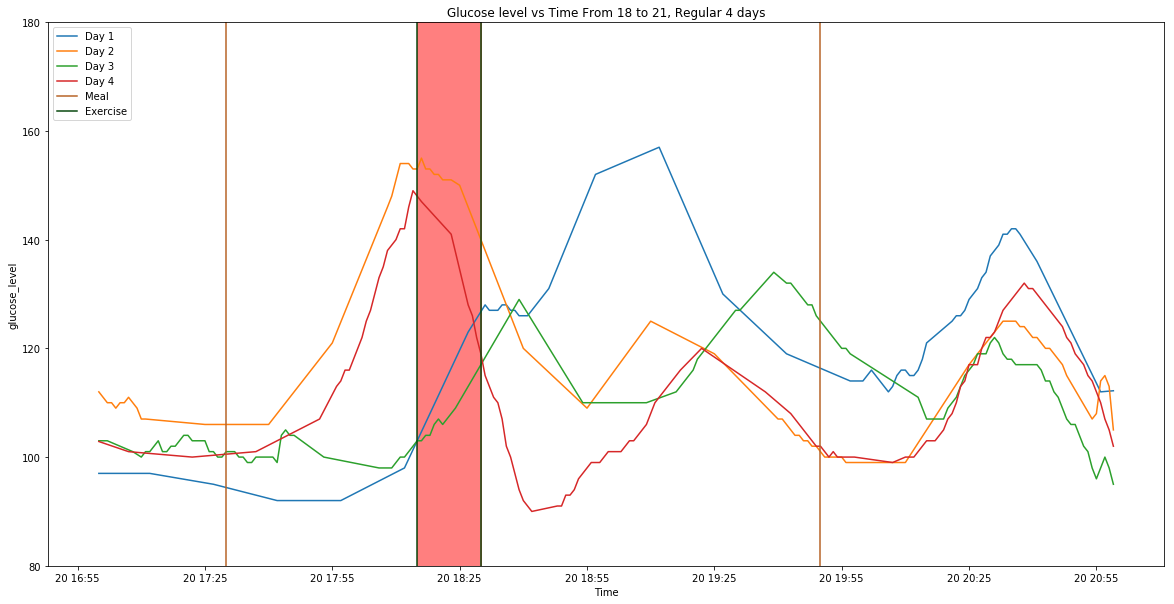

In [100]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(day1[(day1.index.hour <= 20) & (day1.index.hour >= 17)])
# A lot of interpolation here

plt.axvline(x=meal6,color = mycolors[1],label = 'Meal 6')
plt.axvline(x=exe2_s,color = mycolors[2],label = 'Exercise 1 start')
plt.axvline(x=meal7,color = mycolors[1],label = 'Meal 7')

plt.axvline(x=exe2_e,color = mycolors[2],label = 'Exercise 1 end')

ax.axvspan(exe2_s, exe2_e, alpha=0.5, color='red')
plt.legend(['Day 1','Day 2','Day 3','Day 4','Meal','Exercise'],loc='upper left') 
plt.title('Glucose level vs Time From 18 to 21, Regular 4 days')
plt.xlabel('Time')
plt.ylabel('glucose_level')
plt.ylim(80,180)
plt.savefig('figure4.png',dpi = 100)

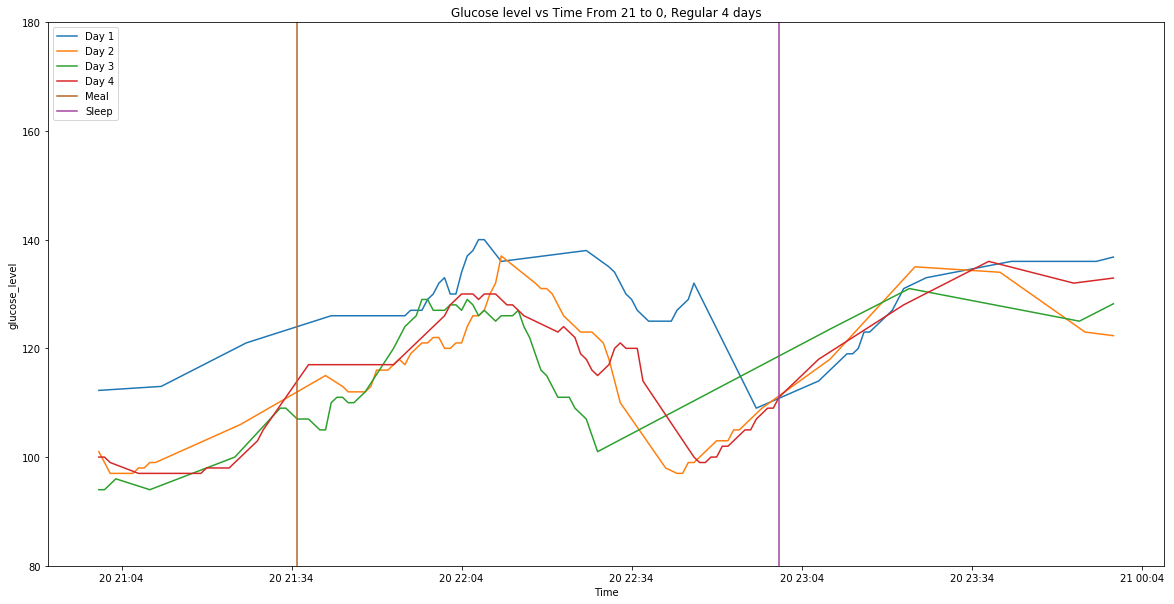

In [104]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(day1[(day1.index.hour <= 23) & (day1.index.hour >= 21)])
plt.axvline(x=meal8,color = mycolors[1],label = 'Meal 7')

plt.axvline(x=sleep,color = mycolors[0],label = 'Exercise 1 end')
plt.legend(['Day 1','Day 2','Day 3','Day 4','Meal','Sleep'],loc='upper left') # A lot of interpolation here
plt.title('Glucose level vs Time From 21 to 0, Regular 4 days')
plt.xlabel('Time')
plt.ylabel('glucose_level')
plt.ylim(80,180)
plt.savefig('figure5.png',dpi = 100)

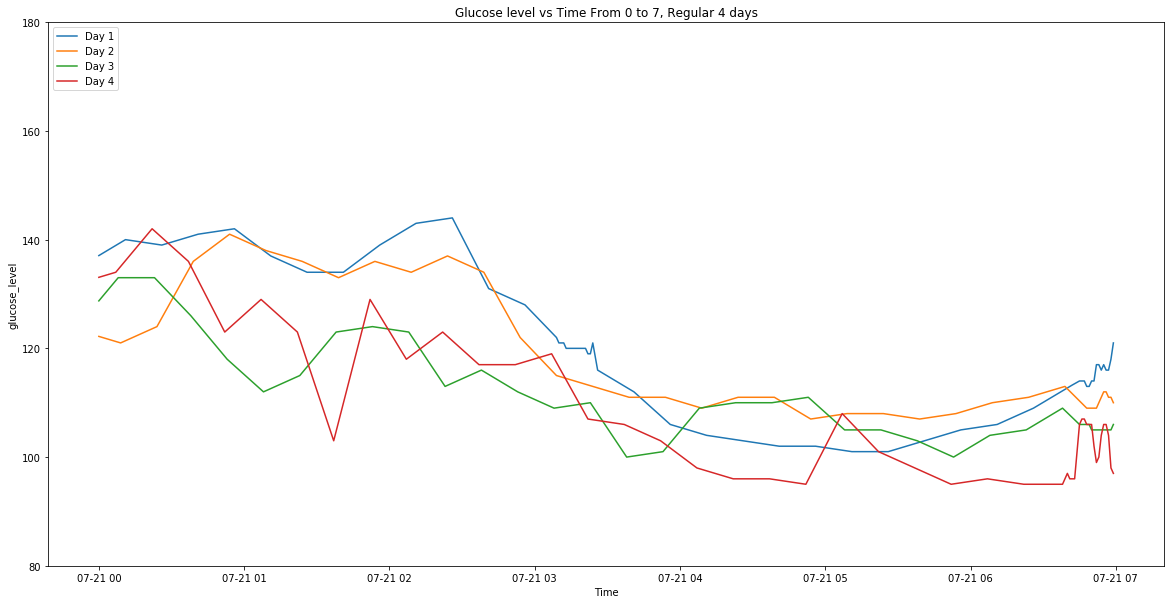

In [105]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(day1[(day1.index.hour <= 6) & (day1.index.hour >= 0)])
plt.legend(['Day 1','Day 2','Day 3','Day 4'],loc='upper left') # A lot of interpolation here
plt.title('Glucose level vs Time From 0 to 7, Regular 4 days')
plt.xlabel('Time')
plt.ylabel('glucose_level')
plt.ylim(80,180)
plt.savefig('figure6.png',dpi = 100)

In [64]:
day1 = pd.DataFrame(day1)

In [65]:
day1['glucose day2'] = day2.values

In [66]:
day1['glucose day3'] = day3.values
day1['glucose day4day.'] = day4.values

In [235]:
allday = day1.copy()

In [236]:
day1['mean'] = allday.T.mean()

In [237]:
day1['std'] = allday.T.std()

In [234]:
day1 = day1.drop(columns=['mean','std'])

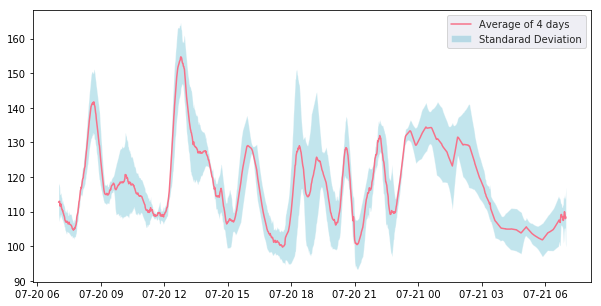

In [215]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize = (10,5))
clrs = sns.color_palette("husl", 5)
with sns.axes_style("darkgrid"):
    meanst = day1['mean'].values
    sdt = day1['std'].values
    ax.plot(day1.index, meanst,  c=clrs[0],label = 'Average of 4 days')
    ax.fill_between(day1.index, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[3],label = 'Standarad Deviation')
    ax.legend()

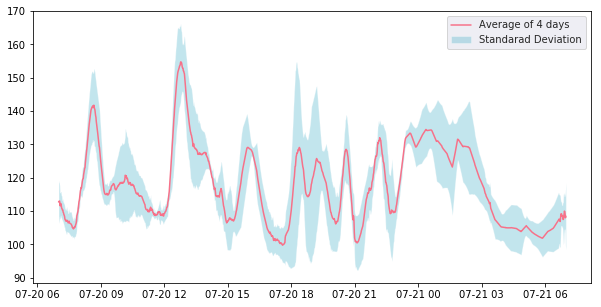

In [238]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize = (10,5))
clrs = sns.color_palette("husl", 5)
with sns.axes_style("darkgrid"):
    meanst = day1['mean'].values
    sdt = day1['std'].values
    ax.plot(day1.index, meanst,  c=clrs[0],label = 'Average of 4 days')
    ax.fill_between(day1.index, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[3],label = 'Standarad Deviation')
    ax.legend()

In [309]:
data_4day = data[(data.index.day >= 20) & (data.index.day <= 24)]

In [310]:
data_temp = data_4day['glucose level']
# data_temp.index = data_temp.index.time

In [311]:
data_temp1 = data_temp[data_temp.index.day == 20]

In [312]:
data_temp2 = data_temp[data_temp.index.day == 21]
data_temp3 = data_temp[data_temp.index.day == 22]
data_temp4 = data_temp[data_temp.index.day == 23]
data_temp5 = data_temp[data_temp.index.day == 24]

In [313]:
data_temp1.index = data_temp1.index.time
data_temp2.index = data_temp2.index.time
data_temp3.index = data_temp3.index.time
data_temp4.index = data_temp4.index.time
data_temp5.index = data_temp5.index.time

Text(0,0.5,'glucose_level')

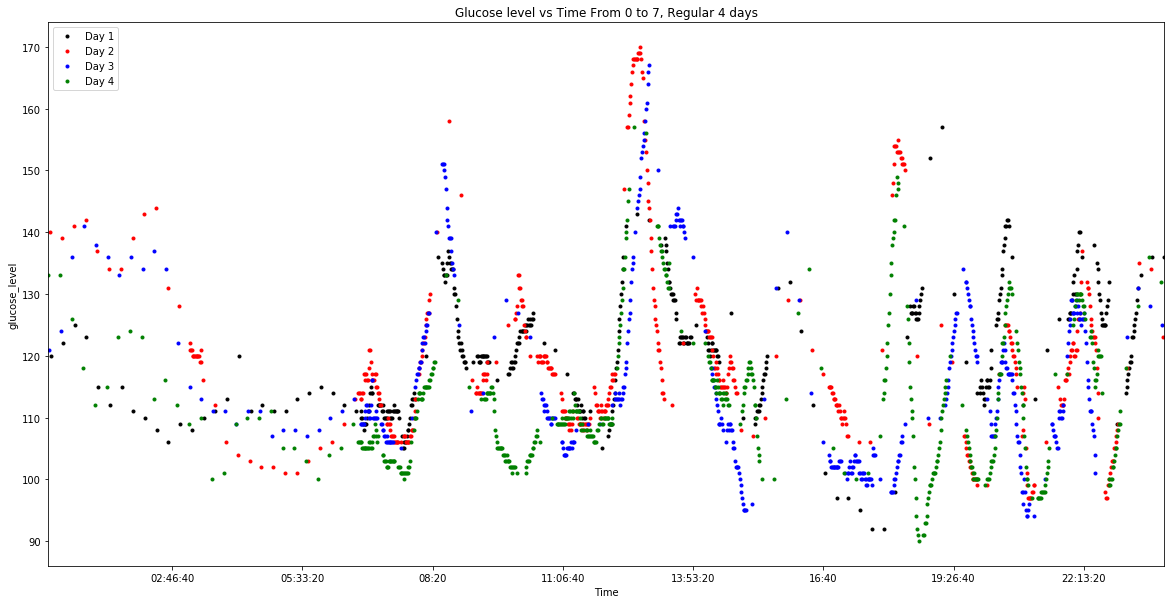

In [319]:
fig, ax = plt.subplots(figsize = (20,10))
upper_ = 6
lower_ = 0
data_temp1.plot(style = 'k.')
data_temp2.plot(style = 'r.')
data_temp3.plot(style = 'b.')
data_temp4.plot(style = 'g.')
plt.legend(['Day 1','Day 2','Day 3','Day 4'],loc='upper left') # A lot of interpolation here
plt.title('Glucose level vs Time From 0 to 7, Regular 4 days')
plt.xlabel('Time')
plt.ylabel('glucose_level')

# plt.savefig('figure6.png',dpi = 100)

Text(0,0.5,'glucose_level')

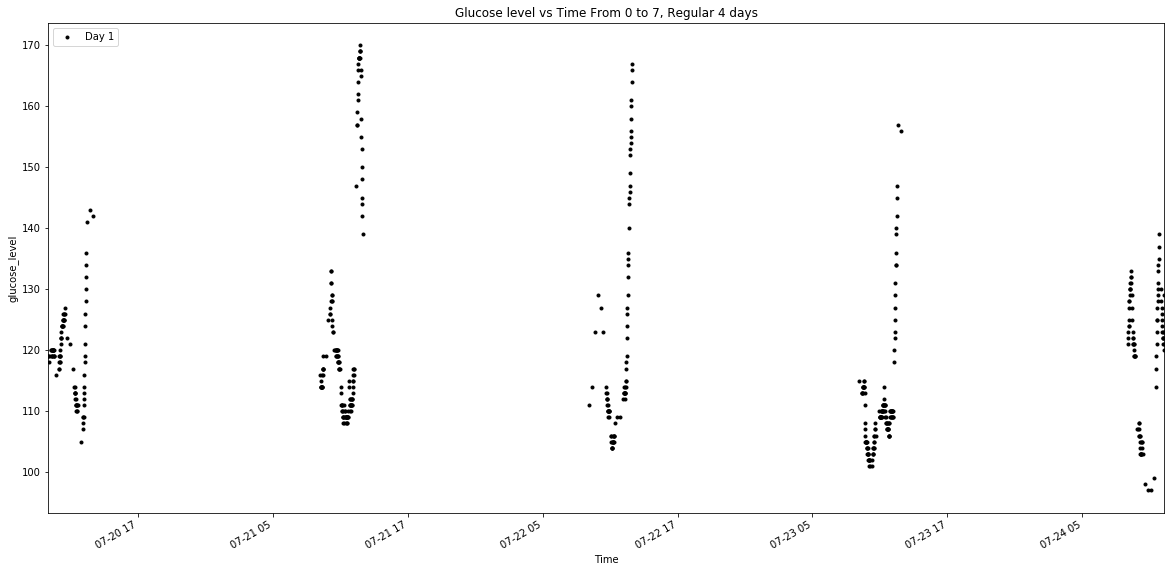

In [255]:
fig, ax = plt.subplots(figsize = (20,10))
data_temp[(data_temp.index.hour <= 12) & (data_temp.index.hour >= 9)].plot(style = 'k.')
plt.legend(['Day 1','Day 2','Day 3','Day 4'],loc='upper left') # A lot of interpolation here
plt.title('Glucose level vs Time From 0 to 7, Regular 4 days')
plt.xlabel('Time')
plt.ylabel('glucose_level')

# plt.savefig('figure6.png',dpi = 100)

In [ ]:
# things to do later:
# Make different colors for these plot
# Highlight impotant time
# Add another one or two day and compare and contrast?
# Try more hours

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
data_temp[(data_temp.index.hour <= 20) & (data_temp.index.hour >= 0)].plot(style = 'k.')
plt.legend(['Day 1','Day 2','Day 3','Day 4'],loc='upper left') # A lot of interpolation here
plt.title('Glucose level vs Time From 0 to 7, Regular 4 days')
plt.xlabel('Time')
plt.ylabel('glucose_level')

# plt.savefig('figure6.png',dpi = 100)

In [249]:
data_4day = data[(data.index.day >= 20) & (data.index.day <= 24)]

In [ ]:
# Try not interpolation on last plot, mean variance plot on these 4 days, comments.

In [88]:
twenty_eight = pd.read_csv('2020-07-2008.08.32.csv')
twenty_eight = twenty_eight[300:]
twenty_ten = pd.read_csv('2020-07-2010.30.40.csv')
twenty_ten = twenty_ten[300:]
# twenty_ten = pd.read_csv('2020-07-2010.30.40.csv')
# twenty_ten = pd.read_csv('2020-07-2010.30.40.csv')
# twenty_ten = pd.read_csv('2020-07-2010.30.40.csv')
# twenty_ten = pd.read_csv('2020-07-2010.30.40.csv')
# twenty_ten = pd.read_csv('2020-07-2010.30.40.csv')

In [89]:
twenty_14 = pd.read_csv('2020-07-2014.25.58.csv')
twenty_14 = twenty_14[300:]

In [90]:
twenty_17 = pd.read_csv('2020-07-2017.29.15.csv')
twenty_17 = twenty_17[300:]

In [91]:
twenty1_102 = pd.read_csv('2020-07-2110.20.19.csv')
twenty1_102 = twenty1_102[300:]
twenty1_105 = pd.read_csv('2020-07-2110.56.23.csv')
twenty1_105 = twenty1_105[300:]

In [92]:
twenty3_170 = pd.read_csv('2020-07-2317.06.43.csv')
twenty3_170 = twenty3_170[300:]
twenty3_175 = pd.read_csv('2020-07-2317.55.50.csv')
twenty3_175 = twenty3_175[300:]

In [93]:
twenty2_10 = pd.read_csv('2020-07-2210.58.35.csv')
twenty2_10 = twenty2_10[300:]
twenty1_11 = pd.read_csv('2020-07-2111.40.46.csv')
twenty1_11 = twenty1_11[300:]

In [94]:
twenty2_10 = pd.read_csv('2020-07-2210.58.35.csv')

In [95]:
twenty5 = pd.read_csv('2020-07-2521.13.05.csv')
twenty5 = twenty5[300:]

In [96]:
shakiness_sum = pd.DataFrame([twenty_eight.var(),twenty_ten.var(),twenty_14.var(),twenty_17.var(),twenty1_102.var(),twenty1_105.var(),twenty1_11.var(),twenty2_10.var(),twenty3_170.var(),twenty3_175.var(),twenty5.var()])

Text(0,0.5,'Variance of Acceleration')

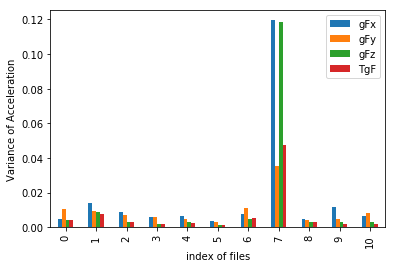

In [72]:
shakiness_sum.plot.bar()
plt.xlabel('index of files')
plt.ylabel('Variance of Acceleration')

Text(0,0.5,'Variance of Acceleration')

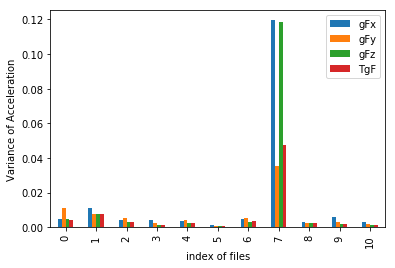

In [97]:
shakiness_sum.plot.bar()
plt.xlabel('index of files')
plt.ylabel('Variance of Acceleration')

Text(0,0.5,'Variance of Acceleration')

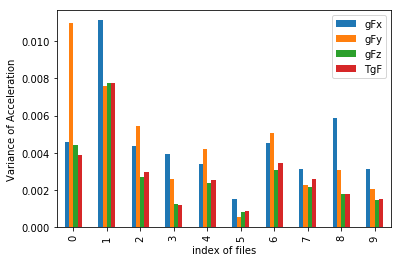

In [99]:
shakiness_sum.plot.bar()
plt.xlabel('index of files')
plt.ylabel('Variance of Acceleration')

In [98]:
shakiness_sum = pd.DataFrame([twenty_eight.var(),twenty_ten.var(),twenty_14.var(),twenty_17.var(),twenty1_102.var(),twenty1_105.var(),twenty1_11.var(),twenty3_170.var(),twenty3_175.var(),twenty5.var()])

In [68]:
twenty_ten.var()

gFx    0.013977
gFy    0.009371
gFz    0.008486
TgF    0.007699
dtype: float64

In [61]:
twenty_14.var()

gFx    0.008897
gFy    0.007002
gFz    0.002874
TgF    0.003001
dtype: float64

In [62]:
twenty_17.var()

gFx    0.005850
gFy    0.005605
gFz    0.001831
TgF    0.001655
dtype: float64

In [69]:
twenty1_102.var()

gFx    0.006550
gFy    0.004795
gFz    0.002724
TgF    0.002656
dtype: float64

In [70]:
twenty1_105.var()

gFx    0.003754
gFy    0.003040
gFz    0.001478
TgF    0.001350
dtype: float64

In [71]:
twenty1_11.var()

gFx    0.007800
gFy    0.011092
gFz    0.004959
TgF    0.005457
dtype: float64

In [72]:
twenty2_10.var()

gFx    0.119525
gFy    0.035046
gFz    0.118144
TgF    0.047635
dtype: float64

In [73]:
twenty3_170.var()

gFx    0.004670
gFy    0.003917
gFz    0.002717
TgF    0.003005
dtype: float64

In [74]:
twenty3_175.var()

gFx    0.011831
gFy    0.004806
gFz    0.002836
TgF    0.001763
dtype: float64

In [ ]:
twen

In [324]:
!ls

 2016.zip		      ncsa		      stat426_hw8.pdf
 2020-07-2008.08.32.csv       nltk_data		      stat426_hw8.rmd
 2020-07-2010.30.40.csv       Pictures		      stat426_mdterm_files
 2020-07-2014.25.58.csv       Public		      stat426_mdterm.pdf
 2020-07-2017.29.15.csv       R			      stat426_mdterm.Rmd
 2020-07-2110.20.19.csv       result1.png	      stat426_midterm_files
 2020-07-2110.56.23.csv       result2.png	      stat426_midterm.pdf
 2020-07-2111.40.46.csv       result3.png	      stat426_midterm.Rmd
 2020-07-2210.58.35.csv       result4.png	      stat431_ex1.pdf
 2020-07-2317.06.43.csv       snap		      stat431_ex1.Rmd
 2020-07-2317.55.50.csv       stat425_final_files     stat431_ex2_files
 2020-07-2521.13.05.csv       stat425_final.pdf       stat431_ex2.pdf
 AMIA2018_Chin_r0706.pdf      stat425_final.Rmd       stat431_ex2.Rmd
 anaconda3		      stat425_hw1_files       stat431_ex3_files
 baidunetdisk		      stat425_hw1.html	      stat431_ex3.pdf
 bin			      stat425_hw1.pdf	      stat431_

In [ ]:
 # Try to add lines to indicate that it's a meal or exercise or sleep or get up

In [ ]:
# For shaikness data, we can see if the magniture of shake is large when glc is low, which is expected.

[1.79995232e+01 2.31305956e-02 8.39389913e+01]
1341.595546606715
1817.2467649007583


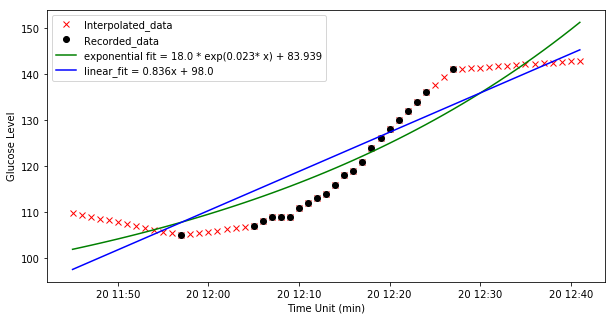

57
142.86666666666667 105.0


In [526]:
idx = np.where(day1_peak2 == day1_peak2.max())[0][0]
y1 = day1_peak2[:idx]
y = y1.values
starting = day1_peak2.index[0]
temp = data[(data.index <= y1.index[-1]) & (data.index >= starting)]['glucose level']
staring2 = y1.index[-1]
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)
print(idx)
print(y.max(),y.min())

[-9.46480075e-01  5.82085854e-02  1.43997080e+02]
35.845909965638505
251.68843734881443


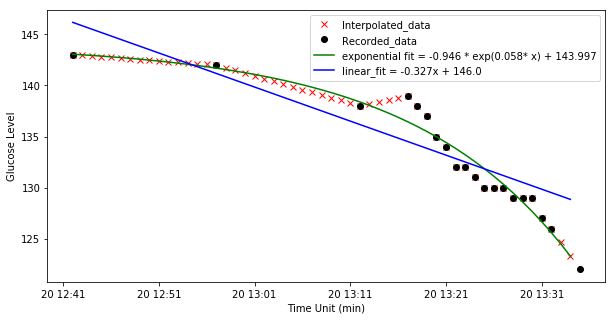

53
143.0 123.33333333333333


In [527]:

idx2 = np.where(day1_peak2 == day1_peak2[idx:idx+60].min())[0][0]
ending = day1_peak2.index[idx2]

temp = data[(data.index <= ending) & (data.index >= staring2)]['glucose level']
y1 = day1_peak2[idx:idx2]

y = y1.values
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)
print(idx2 - idx)
print(y.max(),y.min())

[1.93565104e+01 2.62001446e-02 8.55023340e+01]
2086.034658892342
3711.4293422057694


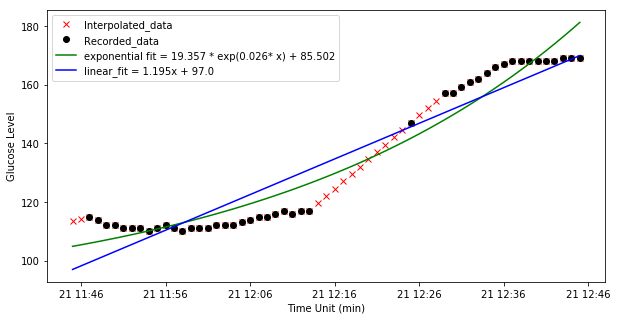

61
169.0 110.0


In [529]:
idx = np.where(day2_peak2 == day2_peak2.max())[0][0]
y2 = day2[285:][:idx]
y = y2.values
starting = day2[285:].index[0]
temp = data[(data.index <= y2.index[-1]) & (data.index >= starting)]['glucose level']
staring2 = y2.index[-1]
x2 = np.linspace(0, len(y2), len(y2))

exponential_regression(y2.index,x2,y,temp)
print(idx)
print(y.max(),y.min())

[ 7.55202997e+01 -4.88431372e-02  9.82943848e+01]
107.01314218663137
1051.6633677298312


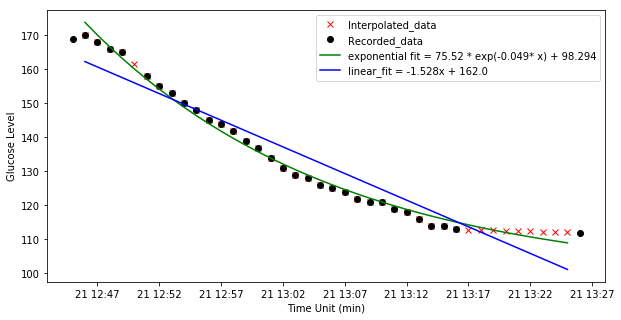

40
170.0 112.1


In [534]:
idx2 = np.where(day2_peak2[idx:] == day2_peak2[idx:idx+60].min())[0][0] + idx
y1 = day2[285:][idx:idx2]
ending = day2[285:].index[idx2]
temp = data[(data.index <= ending) & (data.index >= staring2)]['glucose level']
y = y1.values
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)
print(idx2 - idx)
print(y.max(),y.min())

[2.97479318e+00 4.31773813e-02 1.03687420e+02]
560.5115012440198
3956.848822718147


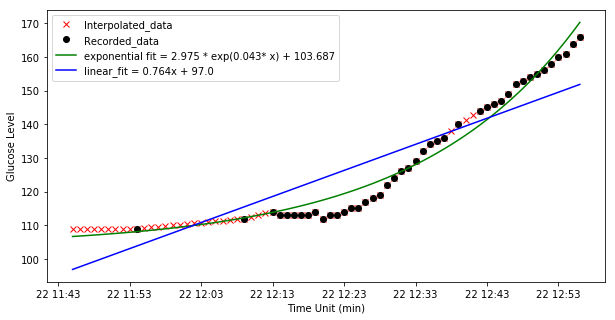

72
166.0 109.0


In [535]:
idx = np.where(day3_peak2 == day3_peak2.max())[0][0]
y2 = day3[285:][:idx]
y = y2.values
starting = day3[285:].index[0]
temp = data[(data.index <= y2.index[-1]) & (data.index >= starting)]['glucose level']
staring2 = y2.index[-1]
x2 = np.linspace(0, len(y2), len(y2))
exponential_regression(y2.index,x2,y,temp)
print(idx)
print(y.max(),y.min())

[ 3.31631991e+01 -5.61602049e-02  1.34568108e+02]
4.643742453289333
67.43549382716047


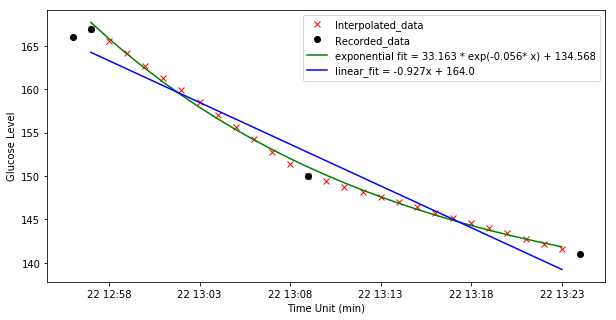

27
167.0 141.6


In [536]:
idx2 = np.where(day3_peak2 == day3_peak2[idx:idx+60].min())[0][0]
y1 = day3[285:][idx:idx2]
y = y1.values
ending = day3[285:].index[idx2]
temp = data[(data.index <= ending) & (data.index >= staring2)]['glucose level']
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)

print(idx2 - idx)
print(y.max(),y.min())

[3.02249606e+00 5.60473937e-02 1.02109713e+02]
324.11215501885044
2176.6871843507065


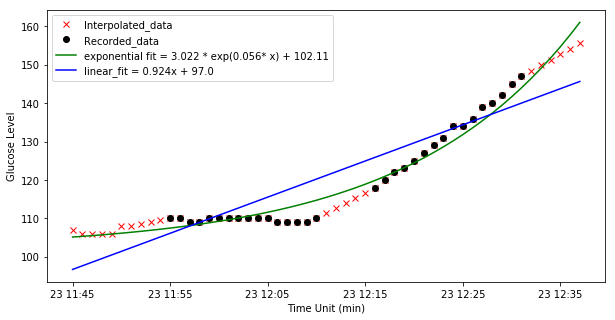

53
155.57142857142858 106.0


In [537]:
idx = np.where(day4_peak2 == day4_peak2.max())[0][0]
y2 = day4[285:][:idx]
y = y2.values
starting = day4[295:].index[0]
temp = data[(data.index <= y2.index[-1]) & (data.index >= starting)]['glucose level']
staring2 = y2.index[-1]
x2 = np.linspace(0, len(y2), len(y2))
exponential_regression(y2.index,x2,y,temp)
print(idx)
print(y.max(),y.min())

[ 9.22123614e+02 -6.77543810e-04 -7.61043513e+02]
291.13550082084305
291.35465591457705


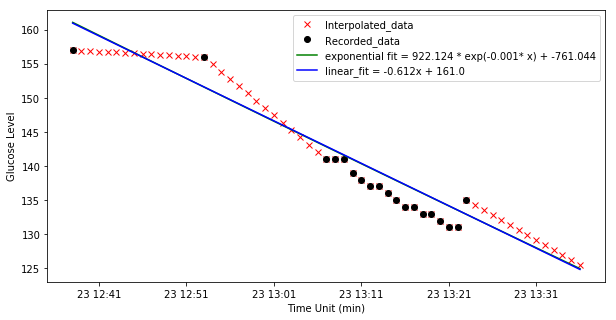

59
157.0 125.46666666666667


In [540]:
idx2 = np.where(day4_peak2[idx:] == day4_peak2[idx:idx+60].min())[0][0] + idx
y1 = day4[285:][idx:idx2]
y = y1.values
ending = day4[285:].index[idx2]
temp = data[(data.index <= ending) & (data.index >= staring2)]['glucose level']
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)

print(idx2 - idx)
print(y.max(),y.min())

In [234]:
from scipy.optimize import curve_fit
def func_exp(x, a, b, c):
        #c = 0
        return a * np.exp(b * x) + c



def linear_regression (index,x_data, y_data):
    m, b = np.polyfit(x_data, y_data, 1)
    plt.plot(index, y_data, 'x', color='red', label = "data")
    plt.plot(index,m*x_data + b,label = 'linear_regression, formula : y = ' + str(round(m,3)) + 'x' + " + " + str(round(b)), color = 'blue')
    plt.xlabel('Time Unit (min)')
    plt.ylabel('Glucose Level')
    plt.legend()
    plt.show()
    return None

In [430]:
first_peak = day1[50:240]
day1_peak1 = first_peak['glucose level']

day2_peak1 = first_peak.day2
day3_peak1 = first_peak.day3
day4_peak1 = first_peak.day4

In [539]:
def exponential_regression (index,x_data, y_data,temp):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.001, 1))
    print(popt)
    plt.figure(figsize=(10,5))
    puntos = plt.plot(index, y_data, 'x', color='red', label = "Interpolated_data")
    plt.plot(temp.index, temp.values, 'o', color='black', label = "Recorded_data")
    curva_regresion = plt.plot(index, func_exp(x_data, *popt), color='green',
    label = 'exponential fit = ' + str(round(popt[0],3)) + ' * exp(' + str(round(popt[1],3)) + '* x)'  + " + " + str(round(popt[2],3)))
    m, b = np.polyfit(x_data, y_data, 1)
    linear_y = m * x_data + b
    print(sum((func_exp(x_data, *popt) - y_data)**2))
    print(sum((linear_y - y_data)**2))
    plt.plot(index,m*x_data + b,color = 'blue',label = 'linear_fit = ' + str(round(m,3)) + 'x' + " + " + str(round(b)))
    plt.xlabel('Time Unit (min)')
    plt.ylabel('Glucose Level')
    plt.legend()
    plt.show()
    return None

[-1.03391342e+02 -6.59929883e-03  2.11780925e+02]
250.29462996913813
259.0004428438045


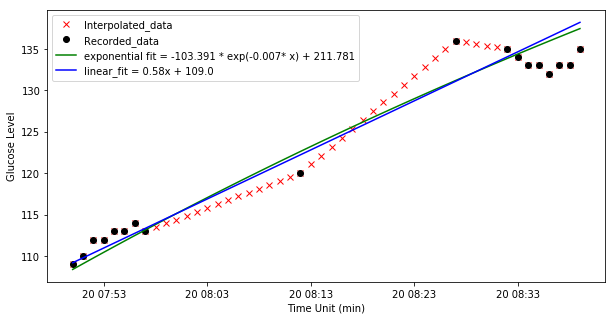

50
136.0 109.0


In [451]:
idx = np.where(day1_peak1 == day1_peak1.max())[0][0]
y1 = day1_peak1[:idx]
y = y1.values
starting = day1_peak1.index[0]
temp = data[(data.index <= y1.index[-1]) & (data.index >= starting)]['glucose level']
staring2 = y1.index[-1]
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)
print(idx)
print(y.max(),y.min())


[ 2.17611629e+01 -1.01766404e-01  1.18371425e+02]
130.02375443170283
785.9672609043877


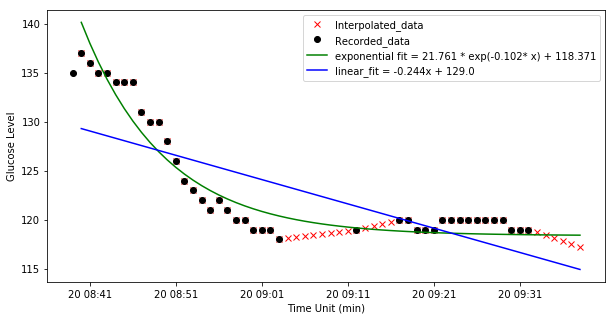

59
137.0 117.2


In [452]:

idx2 = np.where(day1_peak1 == day1_peak1[idx:idx+60].min())[0][0]
ending = day1_peak1.index[idx2]

temp = data[(data.index <= ending) & (data.index >= staring2)]['glucose level']
y1 = day1_peak1[idx:idx2]

y = y1.values
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)
print(idx2 - idx)
print(y.max(),y.min())

[9.06696106e+01 8.77897262e-03 1.49856911e+01]
15.555823743922128
54.98794033852861


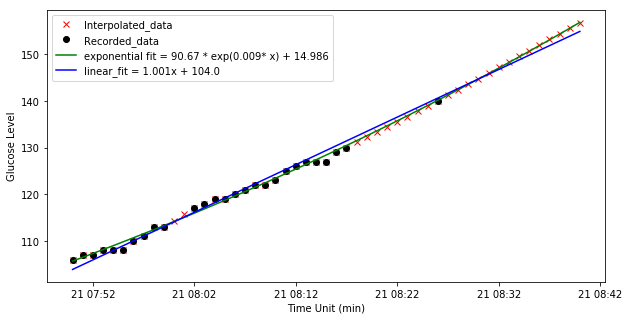

51
156.8 106.0


In [453]:
idx = np.where(day2_peak1 == day2_peak1.max())[0][0]
y2 = day2[50:][:idx]
y = y2.values
starting = day2[50:].index[0]
temp = data[(data.index <= y2.index[-1]) & (data.index >= starting)]['glucose level']
staring2 = y2.index[-1]
x2 = np.linspace(0, len(y2), len(y2))

exponential_regression(y2.index,x2,y,temp)
print(idx)
print(y.max(),y.min())

[-2.26267155e+01  3.36308513e-02  1.81464736e+02]
69.10927739141367
239.18754774637182


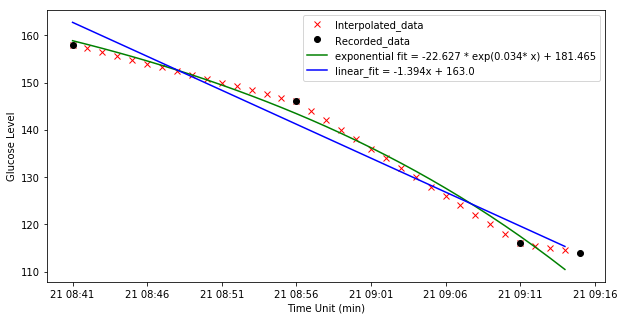

34
158.0 114.5


In [459]:
idx2 = np.where(day2_peak1 == day2_peak1[idx:idx+60].min())[0][0]
y1 = day2_peak1[idx:idx2]
ending = day2[50:].index[idx2]
temp = data[(data.index <= ending) & (data.index >= staring2)]['glucose level']
y = y1.values
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)
print(idx2 - idx)
print(y.max(),y.min())

In [479]:
def exponential_regression (index,x_data, y_data,temp):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0, 1))
    print(popt)
    plt.figure(figsize=(10,5))
    puntos = plt.plot(index, y_data, 'x', color='red', label = "Interpolated_data")
    plt.plot(temp.index, temp.values, 'o', color='black', label = "Recorded_data")
    curva_regresion = plt.plot(index, func_exp(x_data, *popt), color='green',
    label = 'exponential fit = ' + str(round(popt[0],3)) + ' * exp(' + str(round(popt[1],3)) + '* x)'  + " + " + str(round(popt[2],3)))
    m, b = np.polyfit(x_data, y_data, 1)
    linear_y = m * x_data + b
    print(sum((func_exp(x_data, *popt) - y_data)**2))
    print(sum((linear_y - y_data)**2))
    plt.plot(index,m*x_data + b,color = 'blue',label = 'linear_fit = ' + str(round(m,3)) + 'x' + " + " + str(round(b)))
    plt.xlabel('Time Unit (min)')
    plt.ylabel('Glucose Level')
    plt.legend()
    plt.show()
    return None

In [467]:
y2.index[-1]

Timestamp('2020-07-20 08:31:00', freq='T')

[2.04481976e+01 2.61681711e-02 8.85955587e+01]
29.738417399505643
148.7280367384238


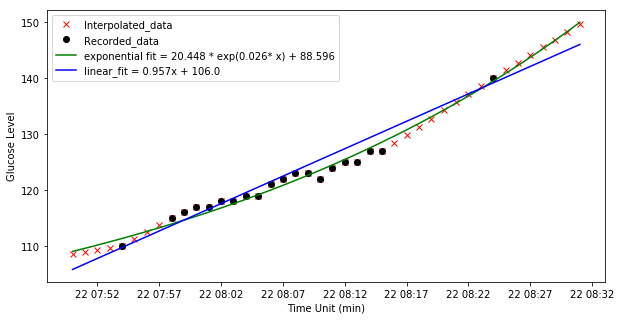

42
149.625 108.66666666666667


In [468]:
idx = np.where(day3_peak1 == day3_peak1.max())[0][0]
y2 = day3[50:][:idx]
y = y2.values
starting = day3[50:].index[0]
temp = data[(data.index <= y2.index[-1]) & (data.index >= starting)]['glucose level']
staring2 = y2.index[-1]
x2 = np.linspace(0, len(y2), len(y2))
exponential_regression(y2.index,x2,y,temp)
print(idx)
print(y.max(),y.min())

[ 9.17784597e+01 -1.59285690e-02  6.12186816e+01]
17.68679235248689
50.56634679792591


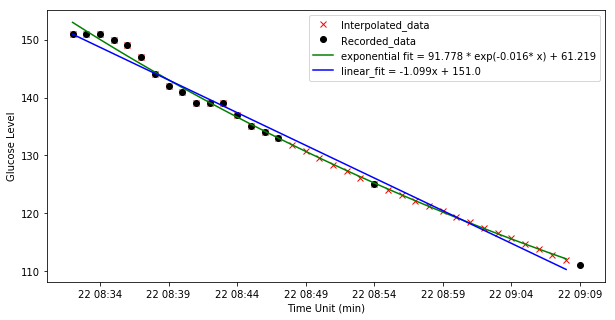

37
151.0 111.93333333333334


In [492]:
idx2 = np.where(day3_peak1 == day3_peak1[idx:idx+60].min())[0][0]
y1 = day3[50:][idx:idx2]
y = y1.values
ending = day3[50:].index[idx2]
temp = data[(data.index <= ending) & (data.index >= staring2)]['glucose level']
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)

print(idx2 - idx)
print(y.max(),y.min())

In [500]:
def exponential_regression (index,x_data, y_data,temp):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.001, 1))
    print(popt)
    plt.figure(figsize=(10,5))
    puntos = plt.plot(index, y_data, 'x', color='red', label = "Interpolated_data")
    plt.plot(temp.index, temp.values, 'o', color='black', label = "Recorded_data")
    curva_regresion = plt.plot(index, func_exp(x_data, *popt), color='green',
    label = 'exponential fit = ' + str(round(popt[0],3)) + ' * exp(' + str(round(popt[1],3)) + '* x)'  + " + " + str(round(popt[2],3)))
    m, b = np.polyfit(x_data, y_data, 1)
    linear_y = m * x_data + b
    print(sum((func_exp(x_data, *popt) - y_data)**2))
    print(sum((linear_y - y_data)**2))
    plt.plot(index,m*x_data + b,color = 'blue',label = 'linear_fit = ' + str(round(m,3)) + 'x' + " + " + str(round(b)))
    plt.xlabel('Time Unit (min)')
    plt.ylabel('Glucose Level')
    plt.legend()
    plt.show()
    return None

[1.12954164e+01 2.43522721e-02 9.52468155e+01]
117.69517847137334
156.55816373728032


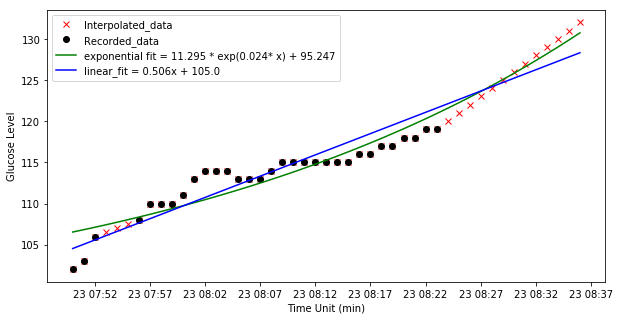

47
132.0 102.0


In [498]:
idx = np.where(day4_peak1 == day4_peak1.max())[0][0]
y2 = day4[50:][:idx]
y = y2.values
starting = day4[50:].index[0]
temp = data[(data.index <= y2.index[-1]) & (data.index >= starting)]['glucose level']
staring2 = y2.index[-1]
x2 = np.linspace(0, len(y2), len(y2))
exponential_regression(y2.index,x2,y,temp)
print(idx)
print(y.max(),y.min())

[ 1.52588204e+02 -3.87872678e-03 -1.74662527e+01]
113.05746249401143
114.62075830771506


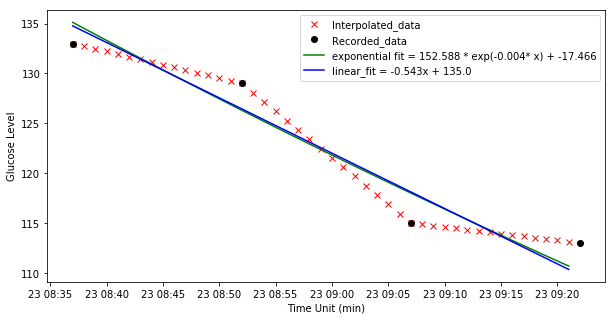

45
133.0 113.13333333333334


In [510]:
idx2 = np.where(day4_peak1[idx:] == day4_peak1[idx:idx+60].min())[0][0] + idx
y1 = day4[50:][idx:idx2]
y = y1.values
ending = day4[50:].index[idx2]
temp = data[(data.index <= ending) & (data.index >= staring2)]['glucose level']
x1 = np.linspace(0, len(y1), len(y1))
exponential_regression(y1.index,x1,y,temp)

print(idx2 - idx)
print(y.max(),y.min())

In [194]:
first_peak = day1[50:240]
day1_peak1 = first_peak['glucose level']

day2_peak1 = first_peak.day2
day3_peak1 = first_peak.day3
day4_peak1 = first_peak.day4

11.334

In [521]:
second_peak = day1[285:400]
day1_peak2 = second_peak['glucose level']
day2_peak2 = second_peak.day2
day3_peak2 = second_peak.day3
day4_peak2 = second_peak.day4

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.